# Load and Explore Data with ML + NLP 
 

In [30]:
import pandas as pd

# Load dataset
df = pd.read_csv("spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

# View first 5 rows
print(df.head(10))



  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...


In [2]:
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])  # spam = 1, ham = 0
df.head()


,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# NLP Preprocessing 
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re




# Download all required resources
nltk.download('punkt')         # For tokenization
nltk.download('stopwords')     # For removing common words
nltk.download('wordnet')       # For lemmatization
nltk.download('omw-1.4')       # WordNet helper data


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\karti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\karti\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [11]:



def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()  # simpler tokenizer
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return ' '.join(tokens)


In [15]:
# clean text col 
df['clean_text'] = df['text'].apply(clean_text)
df['clean_text']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts st ...
3                     u dun say early hor u c already say
4                nah dont think go usf life around though
                              ...                        
5567    nd time tried contact u u pound prize claim ea...
5568                            b going esplanade fr home
5569                           pity mood soany suggestion
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: clean_text, Length: 5572, dtype: object

In [14]:
# train test split 
from sklearn.model_selection import train_test_split

X = df['clean_text'] 
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [16]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [22]:
print(X_train_vec[:5])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34 stored elements and shape (5, 3000)>
  Coords	Values
  (0, 1249)	0.3789384102984926
  (0, 278)	0.42815095765489536
  (0, 2439)	0.24388376997185696
  (0, 1638)	0.35086960859234023
  (0, 448)	0.31708596401467487
  (0, 2984)	0.3205330291502031
  (0, 1109)	0.3223437439723238
  (0, 1695)	0.42815095765489536
  (1, 188)	0.2847937448772163
  (1, 1081)	0.3330881366540654
  (1, 1303)	0.29374459663310737
  (1, 2459)	0.3330881366540654
  (1, 853)	0.3330881366540654
  (1, 1879)	0.21096464777414695
  (1, 1581)	0.2847937448772163
  (1, 1699)	0.3330881366540654
  (1, 2519)	0.32154848171813794
  (1, 421)	0.3330881366540654
  (1, 1862)	0.22104550459662983
  (2, 1050)	0.6490412964782807
  (2, 2210)	0.5653960311493114
  (2, 432)	0.5089918697055971
  (3, 1900)	0.8856036114019864
  (3, 1497)	0.46444186231622053
  (4, 1981)	0.3468734505532593
  (4, 16)	0.30810263017581785
  (4, 2427)	0.34285979040461856
  (4, 2282)	0.2784148318821969
  (4, 2737

In [23]:
# model training - Naive bayes 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model = MultinomialNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Accuracy: 0.9730941704035875

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.80      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115


Confusion Matrix:
 [[965   0]
 [ 30 120]]


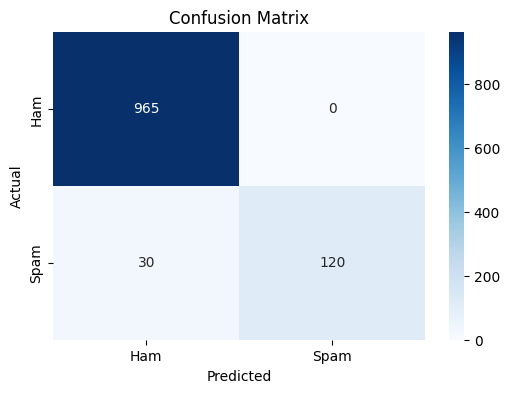

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
import pickle

# Save the trained model and TF-IDF vectorizer
pickle.dump(model, open('spam_model.pkl', 'wb'))
pickle.dump(vectorizer, open('tfidf_vectorizer.pkl', 'wb'))
